In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [58]:
df.columns = ['Signal','Density']

In [59]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

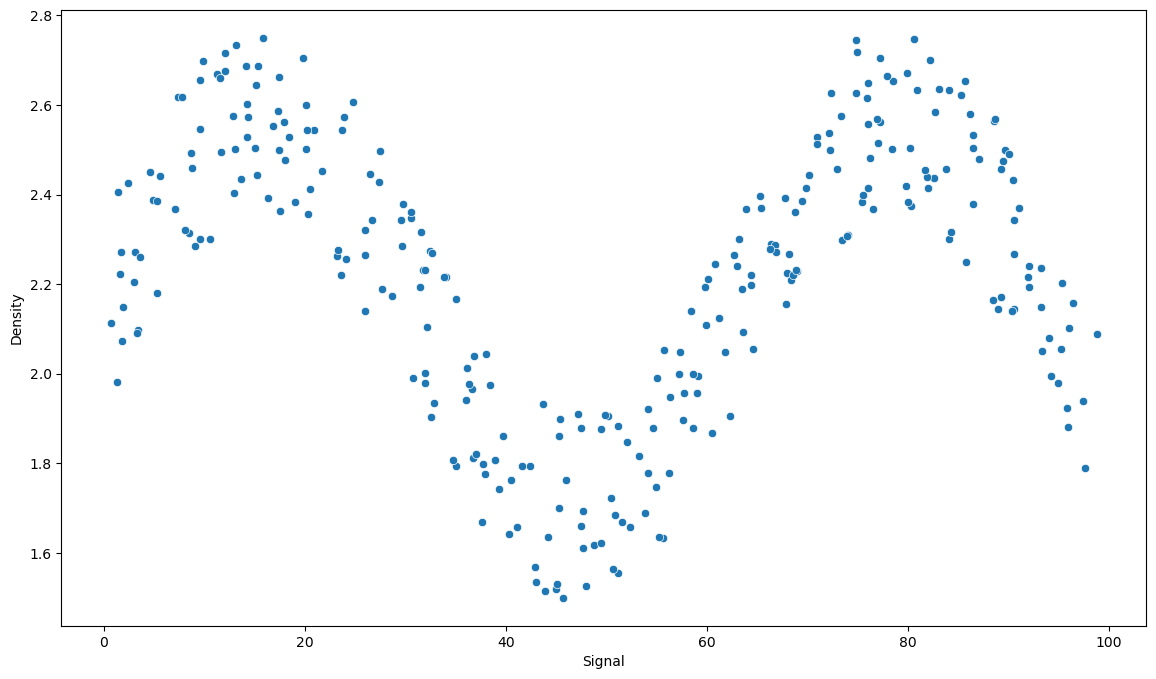

In [60]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Signal',y='Density',data=df)

In [61]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Signal   300 non-null    float64
 1   Density  300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [64]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [65]:
lr_pred = lr_model.predict(X_test)
lr_pred

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y_test,lr_pred))

0.2570051996584629

In [67]:
mean_absolute_error(y_test,lr_pred)

0.21119897331863297

### Function to Help Run Models

In [68]:
def models(mod,X_train,y_train,X_test,y_test):
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'RMSE = {rmse}')
    
    signal_range = np.arange(0,100)
    output = mod.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='Signal',y='Density',data=df,color = 'black')
    plt.plot(signal_range,output)
    plt.show()

RMSE = 0.2570051996584629


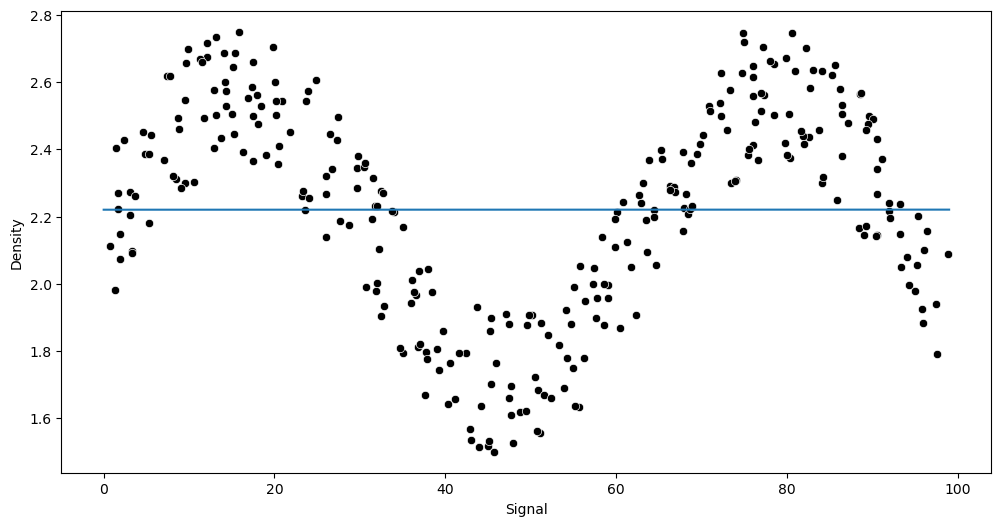

In [69]:
models(lr_model,X_train,y_train,X_test,y_test)

RMSE = 0.14035550375080283


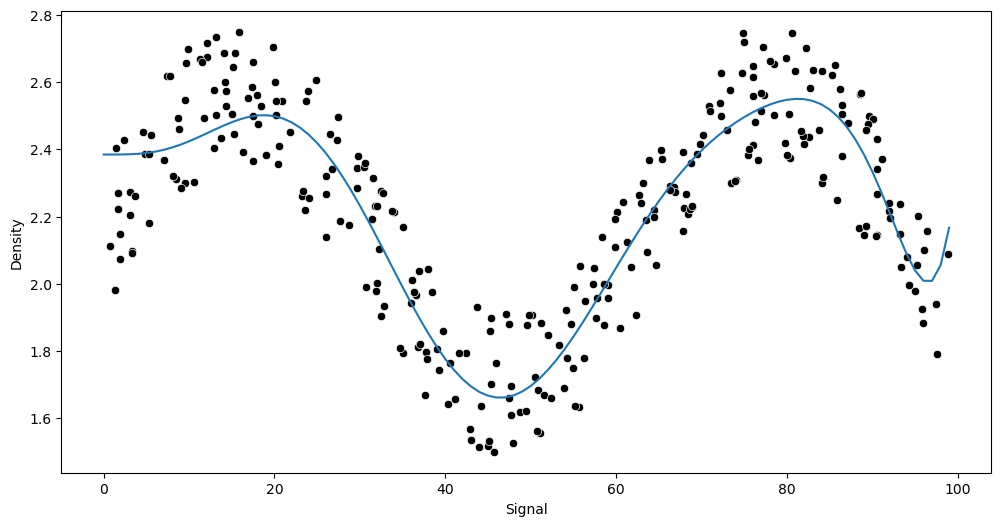

In [70]:
#Polynomial Regression Model

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
models(pipe, X_train,y_train,X_test,y_test)

# KNN

RMSE = 0.15234870286353372


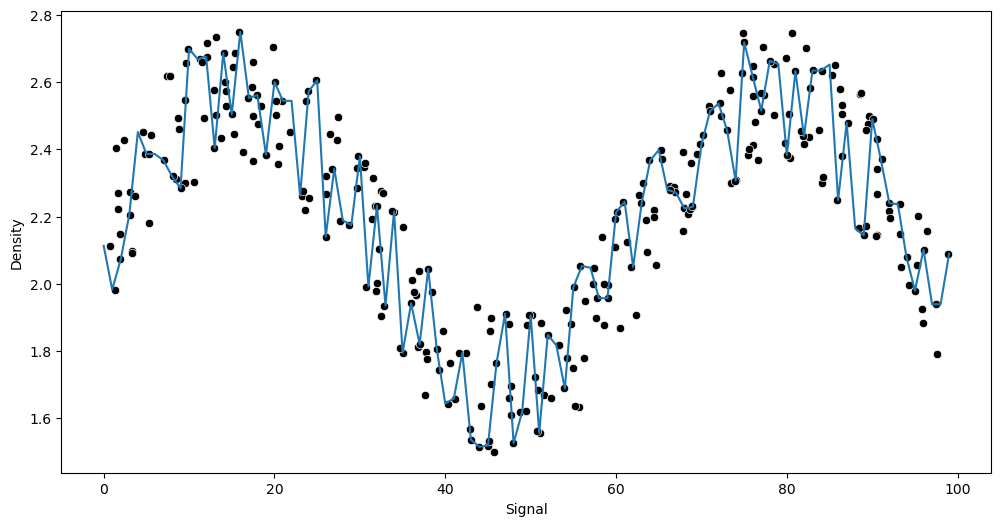

RMSE = 0.13730685016923658


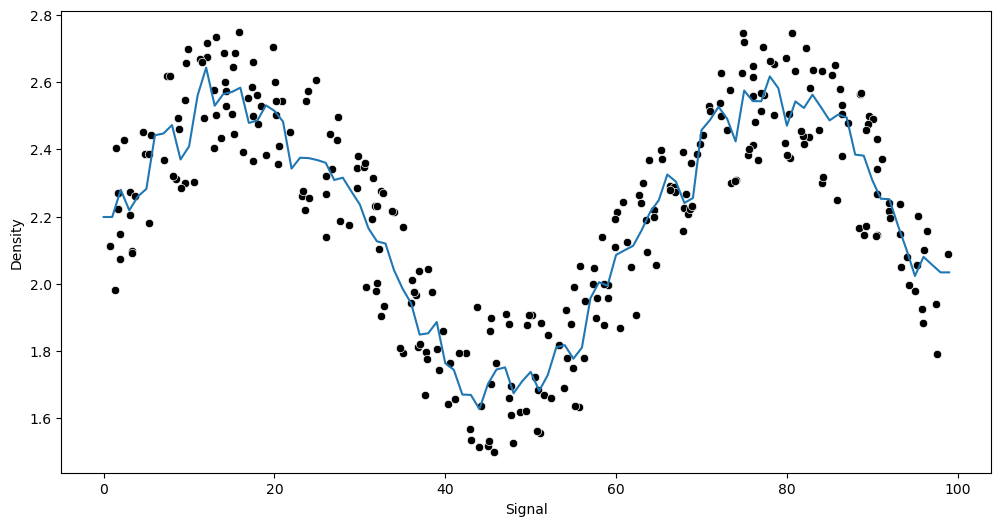

RMSE = 0.13277855732740923


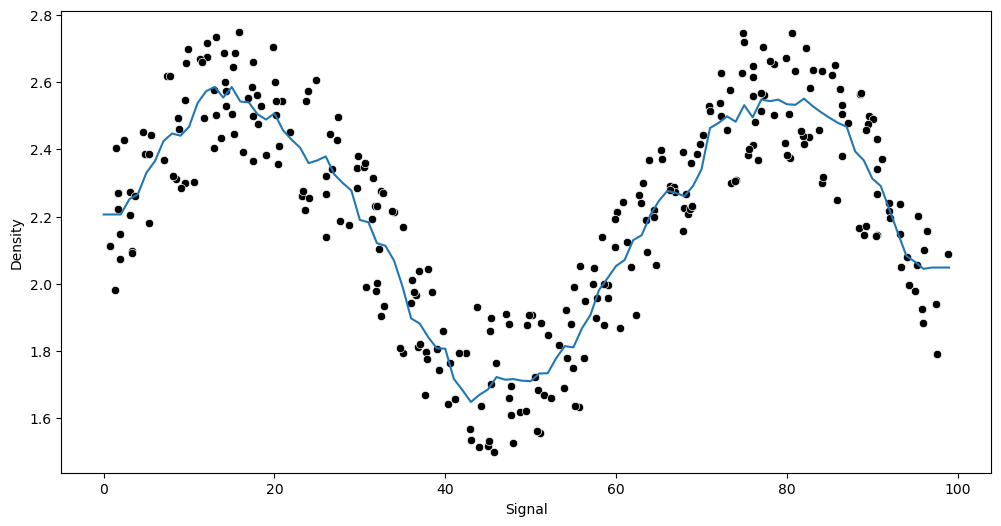

RMSE = 0.2732685415302412


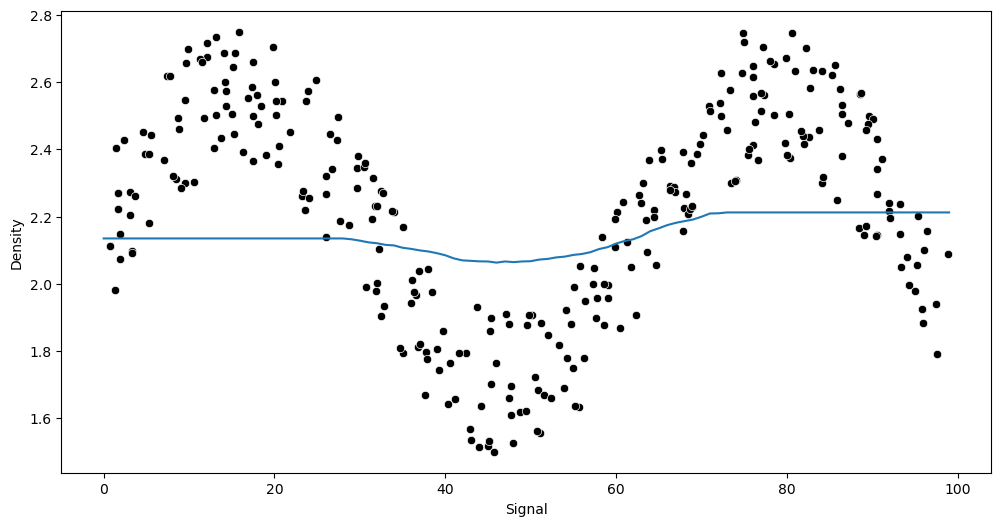

In [75]:
from sklearn.neighbors import KNeighborsRegressor

preds = {}
k_values = [1,5,10,150]
for k in k_values:
    kmodel = KNeighborsRegressor(n_neighbors=k)
    models(kmodel,X_train,y_train,X_test,y_test)

RMSE = 0.1301404448215704


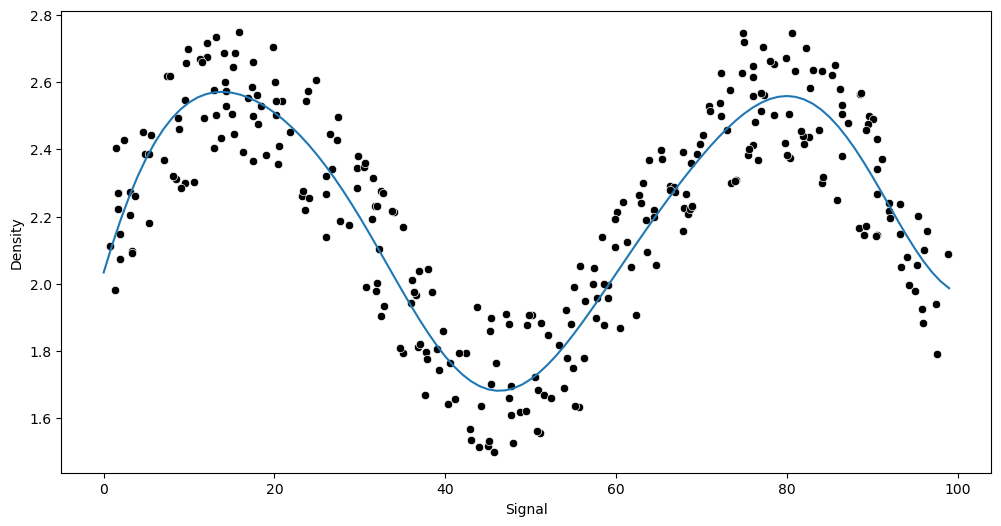

In [76]:
#Support Vector Regression

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,0.5,1,5,10,100],
             'gamma':['auto','scale']}
svr = SVR()

grid = GridSearchCV(svr,param_grid)
models(grid,X_train,y_train,X_test,y_test)

In [77]:
grid.best_estimator_

SVR(C=100)

RMSE = 0.15234870286353372


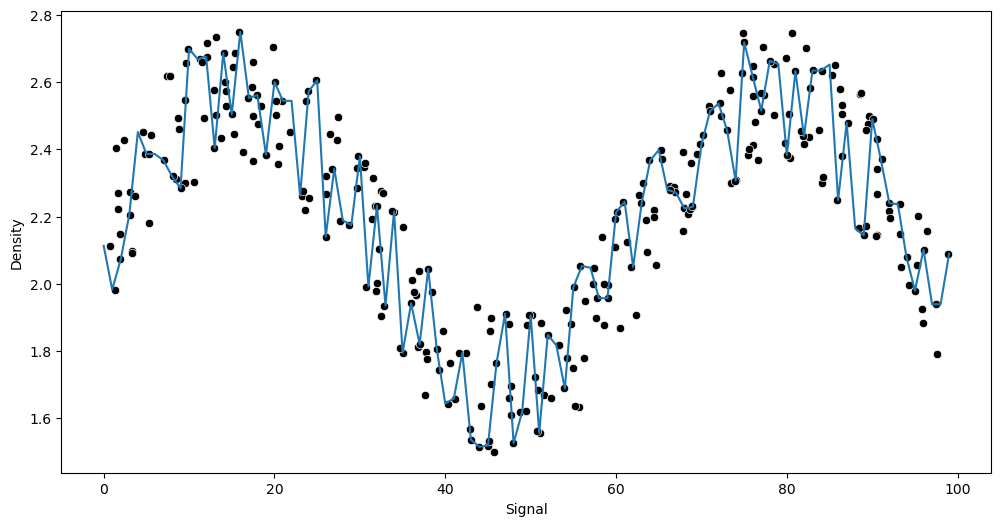

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
models(dtr,X_train,y_train,X_test,y_test)

RMSE = 0.1275794488438559


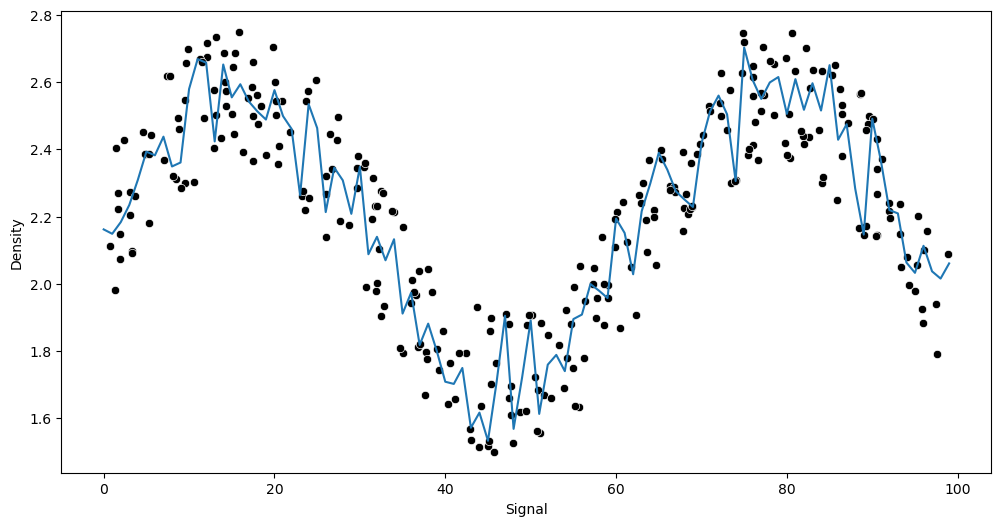

RMSE = 0.13146875869284244


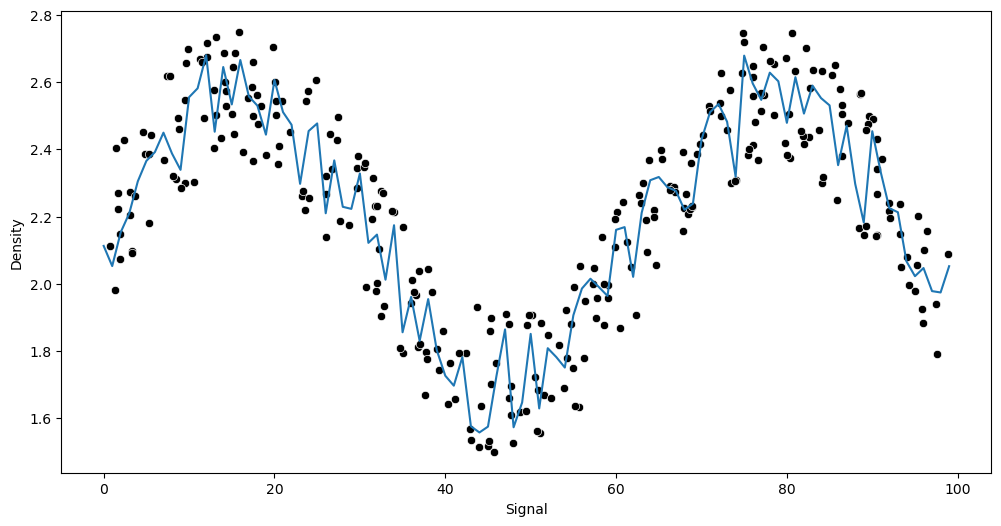

RMSE = 0.13329957833295544


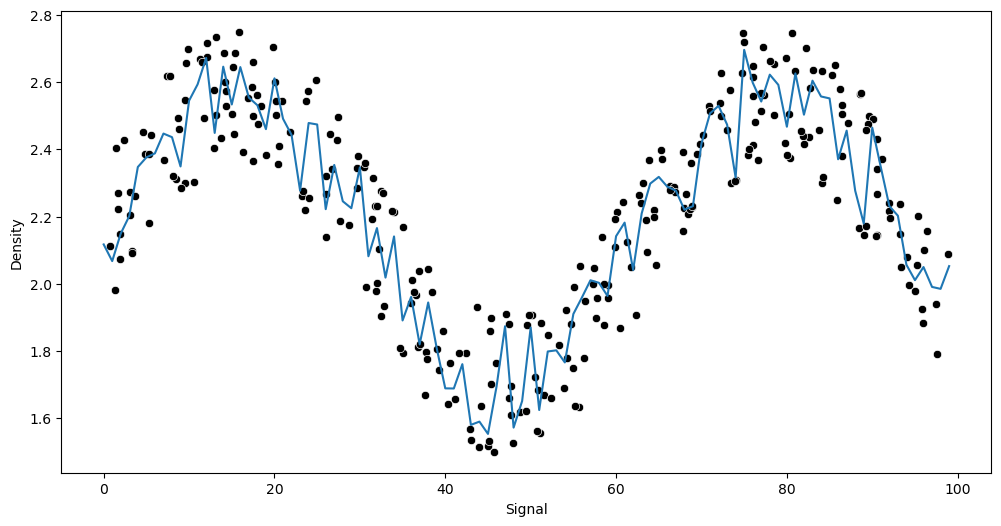

In [80]:
from sklearn.ensemble import RandomForestRegressor

trees = [10,50,100]

for t in trees:
    rfr = RandomForestRegressor(n_estimators=t)
    models(rfr,X_train,y_train,X_test,y_test)

RMSE = 0.13294148649584664


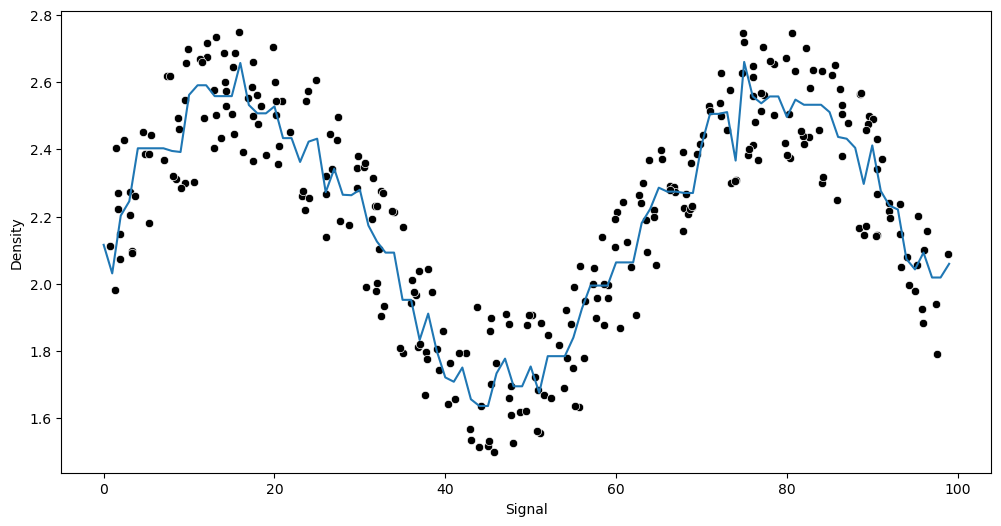

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
models(gb,X_train,y_train,X_test,y_test)

RMSE = 0.1333802314638049


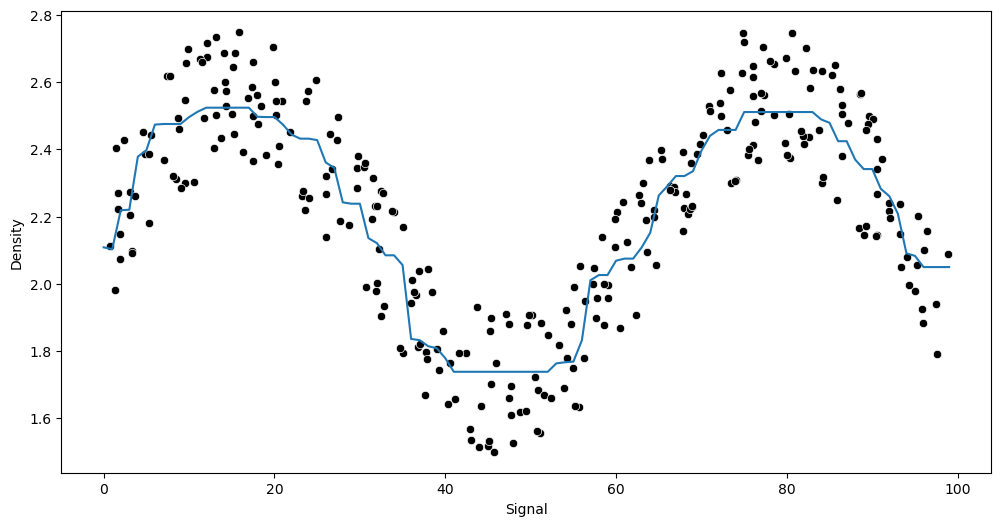

In [83]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
models(ada,X_train,y_train,X_test,y_test)